In [4]:
import json
import requests
import pandas as pd
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from datetime import datetime

In [6]:
#get data from api (Extract) for 10 days(240 hrs)

In [7]:
url = 'http://api.openweathermap.org/data/2.5/forecast?q=Buffalo,US&cnt=240&appid=185f96d27b2e5e0ad2149ce986d32702'
response = requests.get(url)

In [8]:
data = response.json()
json_str = json.dumps(data, indent = 4)
print(json_str)

{
    "cod": "200",
    "message": 0,
    "cnt": 40,
    "list": [
        {
            "dt": 1737601200,
            "main": {
                "temp": 263.01,
                "feels_like": 256.01,
                "temp_min": 262.83,
                "temp_max": 263.01,
                "pressure": 1026,
                "sea_level": 1026,
                "grnd_level": 1000,
                "humidity": 53,
                "temp_kf": 0.18
            },
            "weather": [
                {
                    "id": 804,
                    "main": "Clouds",
                    "description": "overcast clouds",
                    "icon": "04n"
                }
            ],
            "clouds": {
                "all": 99
            },
            "wind": {
                "speed": 5.02,
                "deg": 197,
                "gust": 10.02
            },
            "visibility": 10000,
            "pop": 0,
            "sys": {
                "pod": "n"
            },
   

In [9]:
# Transform


def kel_to_cel(temp):
    return temp - 273.15
    

In [10]:
if response.status_code == 200:
    data = response.json()
    weather_data = []
    for hour in data['list']:
        date_time = datetime.utcfromtimestamp(hour['dt']).strftime('%Y-%m-%d %H:%M:%S')
        temp = kel_to_cel(hour['main']['temp'])
        feels_like = kel_to_cel(hour['main']['feels_like'])
        pressure = hour['main']['pressure']
        humidity = hour['main']['humidity']
        weather_main = hour['weather'][0]['main']
        weather_description = hour['weather'][0]['description']
        wind_speed = hour['wind']['speed']
        wind_direction = hour['wind']['deg']
        cloudiness = hour['clouds']['all']
        rain_volume = hour.get ('rain', {}).get('3h', 0)
        snow_volume = hour.get ('snow', {}).get('3h', 0)
        
        weather_data.append({
            'DateTime': date_time,
            'Temperature':temp,
            'Feels Like Temp': feels_like,
            'Pressure': pressure,
            'Humidity Percent' : humidity,
            'weather' : weather_main,
            'Weather Description' : weather_description,
            'Wind Speed' : wind_speed,
            'Wind Diesction': wind_direction,
            'Cloudiness' : cloudiness,
            'Rain Volume(mm)': rain_volume,
            'Snow Volume(mm)': snow_volume
        })
    
    df = pd.DataFrame(weather_data)
else:
    print(f"Failed to get data : {response.status_code}")


df.head(5)
            
        
    
        

/var/folders/6k/mff7967x5cxbspprnnb_t0f40000gn/T/ipykernel_28259/2499002015.py:5: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  date_time = datetime.utcfromtimestamp(hour['dt']).strftime('%Y-%m-%d %H:%M:%S')


,DateTime,Temperature,Feels Like Temp,Pressure,Humidity Percent,weather,Weather Description,Wind Speed,Wind Diesction,Cloudiness,Rain Volume(mm),Snow Volume(mm)
0,2025-01-23 03:00:00,-10.14,-17.14,1026,53,Clouds,overcast clouds,5.02,197,99,0,0.00
1,2025-01-23 06:00:00,-10.10,-17.10,1026,61,Clouds,overcast clouds,5.78,203,98,0,0.00
2,2025-01-23 09:00:00,-9.35,-16.35,1024,70,Clouds,overcast clouds,5.87,204,100,0,0.00
3,2025-01-23 12:00:00,-7.84,-14.84,1021,85,Snow,light snow,6.22,203,100,0,0.15
4,2025-01-23 15:00:00,-7.32,-14.32,1021,74,Clouds,overcast clouds,6.08,208,95,0,0.00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DateTime             40 non-null     object 
 1   Temperature          40 non-null     float64
 2   Feels Like Temp      40 non-null     float64
 3   Pressure             40 non-null     int64  
 4   Humidity Percent     40 non-null     int64  
 5   weather              40 non-null     object 
 6   Weather Description  40 non-null     object 
 7   Wind Speed           40 non-null     float64
 8   Wind Diesction       40 non-null     int64  
 9   Cloudiness           40 non-null     int64  
 10  Rain Volume(mm)      40 non-null     int64  
 11  Snow Volume(mm)      40 non-null     float64
dtypes: float64(4), int64(5), object(3)
memory usage: 3.9+ KB


In [12]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df["Day"] = df['DateTime'].dt.date
df['Hour'] = df['DateTime'].dt.hour

df_pivot = df.pivot(index='Day', columns='Hour', values='Temperature')

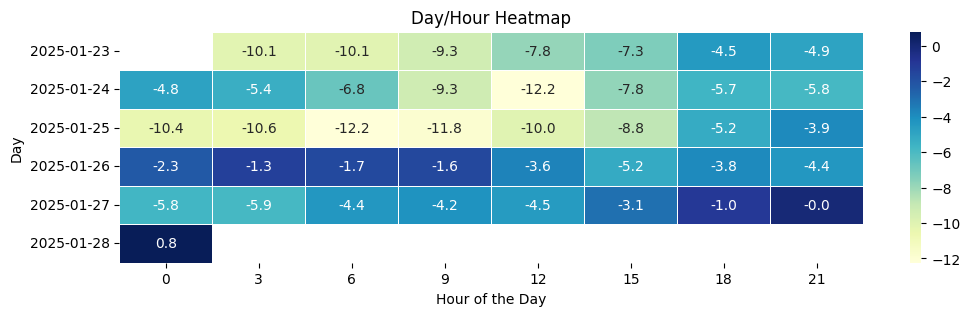

In [13]:

# Plot the heatmap
plt.figure(figsize=(12, 3))
sns.heatmap(df_pivot, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5, cbar=True)
plt.title('Day/Hour Heatmap')
plt.xlabel('Hour of the Day')
plt.ylabel('Day')
plt.show()


In [14]:
average_value = df['Temperature'].mean()

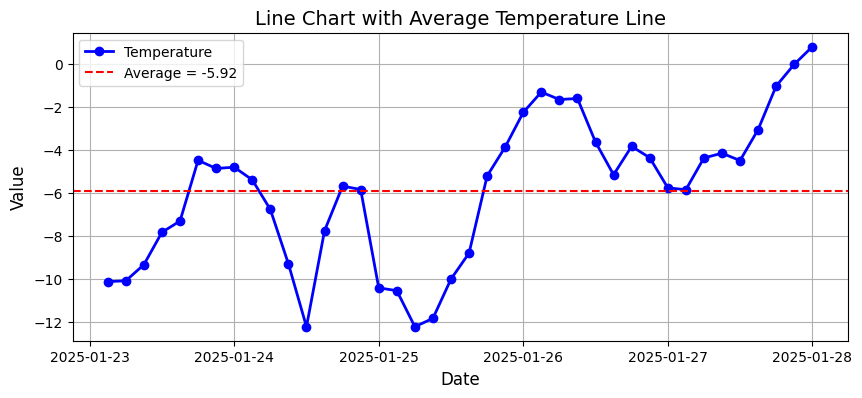

In [15]:
plt.figure(figsize=(10, 4))
plt.plot(df['DateTime'], df['Temperature'], color='b', linestyle='-', linewidth=2, marker='o', markersize=6, label='Temperature')

plt.axhline(y=average_value, color='r', linestyle='--', label=f'Average = {average_value:.2f}')
plt.title('Line Chart with Average Temperature Line', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()




In [13]:
# {
#     "cod": "200",               <-- Top-level key-value pairs
#     "message": 0,
#     "cnt": 40,
#     "list": [                   <-- An array of forecast objects
#         {
#             "dt": 1737601200,           <-- Key-value pair
#             "main": {                   <-- Nested object
#                 "temp": 262.78,
#                 "feels_like": 255.78,
#                 "temp_min": 262.78,
#                 "temp_max": 262.87,
#                 "pressure": 1027,
#                 "sea_level": 1027,
#                 "grnd_level": 1000,
#                 "humidity": 63,
#                 "temp_kf": -0.09
#             },
#             "weather": [                <-- Array of weather objects
#                 {
#                     "id": 804,
#                     "main": "Clouds",
#                     "description": "overcast clouds",
#                     "icon": "04n"
#                 }
#             ],
#             "clouds": {                 <-- Nested object
#                 "all": 100
#             },
#             "wind": {                   <-- Nested object
#                 "speed": 5.12,
#                 "deg": 197,
#                 "gust": 10.23
#             },
#             "visibility": 10000,        <-- Key-value pair
#             "pop": 0,
#             "sys": {                    <-- Nested object
#                 "pod": "n"
#             },
#             "dt_txt": "2025-01-23 03:00:00"   <-- Key-value pair
#         },
#         ...                             <-- More objects like the one above
#     ]
# }


In [14]:
# Loading the data into postgre databasse

In [17]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine

In [18]:
db_username = 'postgres'
db_password = 'qwerty'
db_host = 'localhost'
db_port = 5432
db_name = 'postgres'


In [19]:
engine = create_engine(f'postgresql://{db_username}:{db_password}@{db_host}:{db_port}/{db_name}')

In [21]:
table_name = 'weather'
df.to_sql(table_name, engine, if_exists='replace',index=False)
engine.dispose()